# Data Analysis in Stocks of Amazon and Facebook

## 1. Importing Necessary Modules and reading data of csv file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
%matplotlib inline

In [19]:
stock_data = pd.read_csv("C:/Users/UDAYAN/Desktop/Projects/Python/Stocks/datasets/stock_data.csv", 
                         parse_dates = ['Date'], index_col = ['Date']).dropna()
stock_data

,Amazon,Facebook
Date,,
2016-01-04,636.989990,102.220001
2016-01-05,633.789978,102.730003
2016-01-06,632.650024,102.970001
2016-01-07,607.940002,97.919998
2016-01-08,607.049988,97.330002
...,...,...
2016-12-23,760.590027,117.269997
2016-12-27,771.400024,118.010002
2016-12-28,772.130005,116.919998


In [20]:
benchmark_data = pd.read_csv("C:/Users/UDAYAN/Desktop/Projects/Python/Stocks/datasets/benchmark_data.csv", 
                             parse_dates = ['Date'], index_col = ['Date']).dropna()
benchmark_data

,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03
...,...
2016-12-23,2263.79
2016-12-27,2268.88
2016-12-28,2249.92


## 2. A first glance at the data
Let's take a look at data to find out how many observations and varibales we ahve at our disposal:

In [5]:
print("Stocks\n")
print(stock_data.info())

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
Amazon      252 non-null float64
Facebook    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB
None


In [6]:
print("Benchmarks\n")
print(benchmark_data.info())

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
S&P 500    252 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB
None


## 3. Plot & Summarize daily prices for Amazon and Facebook
Before we compare an investment in either Facebook or Amazon with the index of the 500 largest companies in the United States, let's visualize the data, so we better indertand what we're dealing with.

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


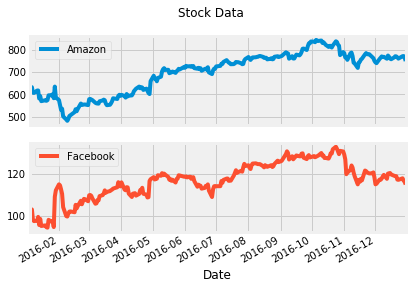

In [7]:
stock_data.plot(title = "Stock Data", subplots = True)
stock_data.describe()

## 4. Visualize & Summarize daily values for the S&P 500
Let's also take a closer look at the value of the s&P 500, our benchmark.

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


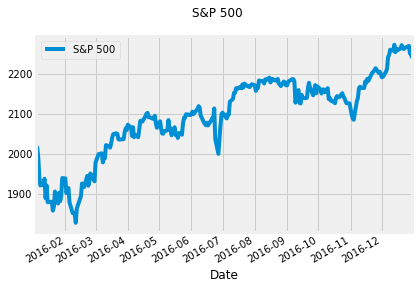

In [8]:
benchmark_data.plot(title = 'S&P 500', subplots = True)
benchmark_data.describe()


## 5. The inputs for the Sharpe Ratio: Starting with Daily Stock Returns
The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.

However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio. Can you already guess the result?

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


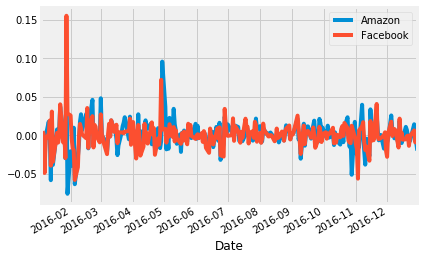

In [9]:
stock_returns = stock_data.pct_change()
stock_returns.plot()
stock_returns.describe()

## 6. Daily S&P 500 Returns
For the S&P 500, calculating daily returns works just the same way, we just need to make sure we select it as a Series using single brackets [] and not as a DataFrame to facilitate the calculations in the next step.

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

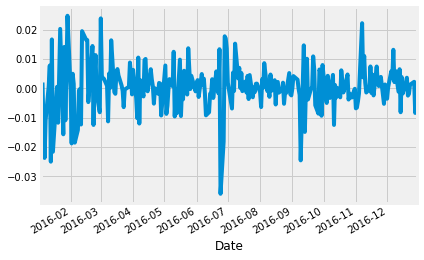

In [10]:
sp_returns = benchmark_data['S&P 500'].pct_change()
sp_returns.plot()
sp_returns.describe()

## 7. Calculating Excess Returns for Amazon and Facebook vs. S&P 500
Next, we need to calculate the relative performance of stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between stock_returns and sp_returns for each day.

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


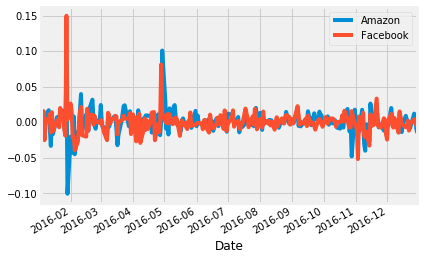

In [11]:
excess_returns = stock_returns.sub(sp_returns, axis = 0)
excess_returns.plot()
excess_returns.describe()

## 8. The Sharepe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs. S&P 500
Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark.

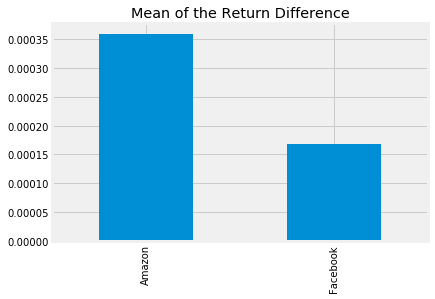

In [13]:
avg_excess_return = excess_returns.mean()
avg_excess_return.plot.bar(title = "Mean of the Return Difference")

## 9. The Sharpe Ratio, Step 2: Standard Devaition of the Return Difference
It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.

Next, we calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.

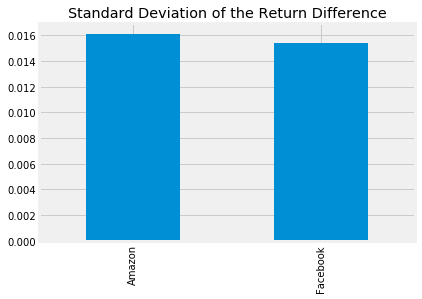

In [14]:
std_excess_return = excess_returns.std()
std_excess_return.plot.bar(title = "Standard Deviation of the Return Difference")

## 10. Putting it all together
Now we just need to compute the ratio of avg_excess_returns and sd_excess_returns. The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.

The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252

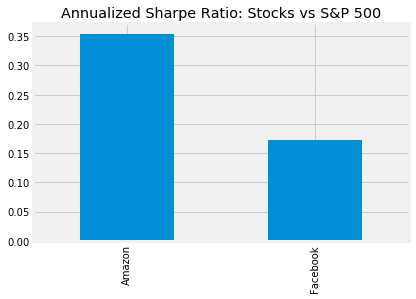

In [18]:
daily_sharpe_ratio = avg_excess_return.div(std_excess_return)
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
annual_sharpe_ratio.plot.bar(title= "Annualized Sharpe Ratio: Stocks vs S&P 500");

## 11. Conclusion
Given the two Sharpe ratios, which investment should we go for? In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Amazon would have been more attractive.

This difference was mostly driven by differences in return rather than risk between Amazon and Facebook. The risk of choosing Amazon over FB (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Amazon.

When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.